# Abstract

## Problem Statement
- *Customers*: League of Legends players
- *Problem*: Predict and interperate champion popularity
- *Solution*: Linear regression model

## Work Plan
- *Data*: Web scrape champion statistics by date
- *Model*: Linear regression
- *Measure of Success*: TBD

# Obtain the Data


## Map the Data Pipeline

*After completing this step, be sure to edit `references/data_dictionary` to include descriptions of where you obtained your data and what information it contains.*

## Build the Pipeline Tools

*Make sure these steps are reproducible by code. Put some thought into the directory structures and filepaths you are using to save your data, so it's easy to load files you need.*

In [1]:
# %%writefile src/obtain.py

# def basic_lr_model(y_idx):
#     """
#     Reads cleaned data set from clean_data.csv and runs it as is
#     through an OLS linear regression model using statsmodels.api
    
#     Input
#     -----
#     y_idx: column index of the clean data set that corresponds to the predicted variable
    
#     Output
#     ------
#     model : the OLS model computed by statsmodel.api.OLS()
#     fit   : best fit of the OLS model to the data 
#     """
    
#     # Import relevant modules
#     import patsy
#     import pandas as pd
#     import statsmodels.api as sm
    
#     # Read in clean data
#     datadir = '/Users/jeremy_lehner/Documents/GitHub/metis_project2/data/processed/clean_data.csv'
#     df = pd.read_csv(datadir)
    
#     # Construct R formula style string
#     colnames = list(df.columns)
#     y_name = colnames[y_idx]
#     colnames.remove(y_name)
    
#     R_formula = y_name + ' ~ ' + ' + '.join(colnames)
    
#     # Construct target vector y and feature matrix X
#     y, X = patsy.dmatrices(R_formula, data = df, return_type = "dataframe")
    
#     # Construct OLS model
#     model = sm.OLS(y, X)

#     # Fit model to training set
#     fit = model.fit()
    
#     # Return the model and the fit
#     return model, fit

# write functions that form a data pipeline, 
# then run this cell to save them in src/obtain.py

Overwriting src/obtain.py


## Run the Pipeline

*Set this up so that you won't need to download datasets that you already have on your computer when you re-run the pipeline.*

In [6]:
# import data pipeline functions
#pipelinedir = '/Users/jeremy_lehner/Documents/GitHub/metis_project2/src'
#import sys
#sys.path.insert(0, pipelinedir)
#from obtain import basic_lr_model
#import statsmodels.api as sm

# def run_data_pipeline():
#     # call data pipeline functions in order
#     model, fit = basic_lr_model(5)
#     pass

#run_data_pipeline()

NameError: name 'model' is not defined

# Scrub the Data


## Load Data

## Verify Data Integrity

## Engineer Features

*Before moving on to exploratory analysis, write down some notes about challenges encountered while working with this data that might be helpful for anyone else (including yourself) who may work through this later on.*

# Explore the Data

*Before you start exploring the data, write out your thought process about what you're looking for and what you expect to find. Take a minute to confirm that your plan actually makes sense.*

*Calculate summary statistics and plot some charts to give you an idea what types of useful relationships might be in your dataset. Use these insights to go back and download additional data or engineer new features if necessary. Not now though... remember we're still just trying to finish the MVP!*

## Inspect Raw Data

## Inspect Features for Predictive Patterns

*In a regression model, we are looking for clear relationships between our features and targets. Generate pairplots and look for features that have high correlations with the target variable.*

*In a classification model, we are looking for features that separate the population into distinct distributions. Generate pairplots that are color-coded by your categories and look for features where the categories have distinct distributions.*

- *What did you learn about your data?*
- *Does it look like there are clear patterns and relationships among your features that will allow you to make good predictions?*
- *Which features do you think will be most helpful?*

# Model the Data

*Describe the algorithms that you are considering. How do they work? Why are they good choices for this data and problem space?*

*What nuances in the data will you have to be aware of in order to avoid introducing bias to your model? What steps will you need to take to prevent overfitting? What risks are there for data leakage?*

In [33]:
# Import relevant modules
import patsy
import pandas as pd
import statsmodels.api as sm

y_idx = 5

# Read in clean data
datadir = '/Users/jeremy_lehner/Documents/GitHub/metis_project2/data/processed/clean_data.csv'
df = pd.read_csv(datadir)

# Construct R formula style string
colnames = list(df.columns)
colnames.remove('champion')
y_name = colnames[y_idx]
colnames.remove(y_name)

R_formula = y_name + ' ~ ' + ' + '.join(colnames)

# Construct target vector y and feature matrix X
y, X = patsy.dmatrices(R_formula, data = df, return_type = "dataframe")

# Construct OLS model
model = sm.OLS(y, X)

# Fit model to training set
fit = model.fit()

# Return the model and the fit
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              pick_rate   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     76.48
Date:                Wed, 17 Jul 2019   Prob (F-statistic):           1.42e-50
Time:                        17:39:24   Log-Likelihood:                 591.10
No. Observations:                 290   AIC:                            -1170.
Df Residuals:                     284   BIC:                            -1148.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.1198      0.046     -2.614      0.009      -0.210      -0.030
days_old       -2.865e-05    3.1e-06     -9.244      0.000   -3.48e-05   -2.26e-05
num_last_patch -8.148e-05      0.000     -0.374      0.709      -0.001       0.000
num_skins          0.0119      0.001     11.431      0.000       0.010       0.014
win_rate           0.3486      0.094      3.719      0.000       0.164       0.533
ban_rate           0.2550      0.019     13.362      0.000       0.217       0.293
==============================================================================
Omnibus:                       51.052   Durbin-Watson:                   1.731
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.880
Skew:                           0.998   Prob(JB):                     3.70e-19
Kurtosis:                       4.743   Cond. No.                     1.64e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

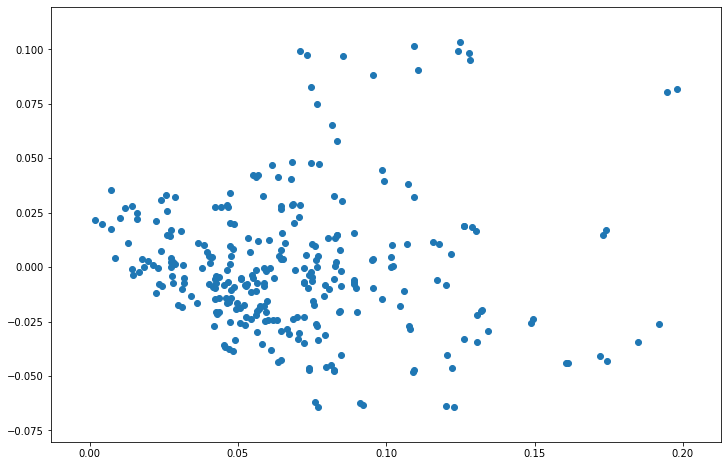

In [34]:
# Use statsmodels to plot the residuals vs the fitted values
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.scatter(fit.predict(), fit.resid);

## Train Test Split

## Preprocessing

### Label Encoding

### Feature Scaling

## Build and Train Model

_Write down any thoughts you may have about working with these algorithms on this data. What looks to have been the most successful design choices? What pain points are you running into? What other ideas do you want to try out as you iterate on this pipeline?_

## Predict and Score

## Inspect Errors

# iNterpret the Model

_Write up the things you learned, and how well your model performed. Be sure address the model's strengths and weaknesses. What types of data does it handle well? What types of observations tend to give it a hard time? What future work would you or someone reading this might want to do, building on the lessons learned and tools developed in this project?_

## Strengths and Weaknesses

## What Else Can We Do?

- *find more data*
- *build new features*
- *try new models*

_(These are the obvious answers. The more interesting questions are **what** to try, **how** to do it, and **why** you think it might make a difference.)_